
### Querying the Aarhus traffic data

### Table format
['extid', 'varchar', False, 1, 1, None, None]

['ts', 'timestamp', False, 2, 2, 30, 'd']

['avgMeasuredTime', 'sint64', False, None, None, None, None]

['avgSpeed', 'sint64', False, None, None, None, None]

['medianMeasuredTime', 'sint64', False, None, None, None, None]

['vehicleCount', 'sint64', False, None, None, None, None]

['id', 'sint64', False, None, None, None, None]

In [1]:
from riak import RiakClient
c=RiakClient(transport_options={'ts_convert_timestamp':True})
c.ping()

/home/stephen/aarhus/local/lib/python2.7/site-packages/riak/security.py:45: UserWarning: OpenSSL 1.0.1f 6 Jan 2014 (>= 1.0.1g required), TLS 1.2 support: False
  warnings.warn(msg, UserWarning)


True

In [2]:
startdate="'2014-02-13T00:00:00'"
enddate="'2014-04-12T23:59:59.99'"
print startdate, enddate

'2014-02-13T00:00:00' '2014-04-12T23:59:59.99'


In [3]:
q="""
    select count(*)  from aarhus where ts > {t1} and ts < {t2} and extid='668'
"""
query=q.format(t1=startdate, t2=enddate)
print query
ds=c.ts_query('aarhus', query)
#print ds

#for r in range(0,10):
#    print ds.rows[r]

#print len(ds.rows)
print ds.rows


    select count(*)  from aarhus where ts > '2014-02-13T00:00:00' and ts < '2014-04-12T23:59:59.99' and extid='668'

[[16131]]


In [15]:
q="""
    select *  from aarhus where ts > {t1} and ts < {t2} and extid='668'
"""
query=q.format(t1=startdate, t2=enddate)
print query
ds1=c.ts_query('aarhus', query)
#print ds

#for r in range(0,10):
#    print ds.rows[r]

#print len(ds.rows)
for r in range (100,5000):
    print ds1.rows[r]
    


    select *  from aarhus where ts > '2014-02-13T00:00:00' and ts < '2014-04-12T23:59:59.99' and extid='668'

['668', datetime.datetime(2014, 2, 13, 19, 50), 59, 62, 59, 1, 234900]
['668', datetime.datetime(2014, 2, 13, 19, 55), 59, 62, 59, 0, 235349]
['668', datetime.datetime(2014, 2, 13, 20, 0), 59, 62, 59, 0, 235798]
['668', datetime.datetime(2014, 2, 13, 20, 5), 59, 62, 59, 0, 236247]
['668', datetime.datetime(2014, 2, 13, 20, 10), 59, 62, 59, 0, 236696]
['668', datetime.datetime(2014, 2, 13, 20, 15), 59, 62, 59, 0, 237145]
['668', datetime.datetime(2014, 2, 13, 20, 20), 59, 62, 59, 0, 237594]
['668', datetime.datetime(2014, 2, 13, 20, 25), 59, 62, 59, 0, 238043]
['668', datetime.datetime(2014, 2, 13, 20, 30), 59, 62, 59, 0, 238492]
['668', datetime.datetime(2014, 2, 13, 20, 35), 59, 62, 59, 0, 238941]
['668', datetime.datetime(2014, 2, 13, 20, 40), 59, 62, 59, 0, 239390]
['668', datetime.datetime(2014, 2, 13, 20, 45), 61, 60, 61, 1, 239839]
['668', datetime.datetime(2014, 2, 13, 

In [5]:
q="""
    select max(avgSpeed)  from aarhus where ts > {t1} and ts < {t2} and extid='668'
"""
query=q.format(t1=startdate, t2=enddate)
print query
ds=c.ts_query('aarhus', query)
#print ds

#for r in range(0,10):
#    print ds.rows[r]

#print len(ds.rows)
print ds.rows


    select max(avgSpeed)  from aarhus where ts > '2014-02-13T00:00:00' and ts < '2014-04-12T23:59:59.99' and extid='668'

[[132]]


In [6]:
q="""
    select min(avgSpeed)  from aarhus where ts > {t1} and ts < {t2} and extid='668'
"""
query=q.format(t1=startdate, t2=enddate)
print query
ds=c.ts_query('aarhus', query)
#print ds

#for r in range(0,10):
#    print ds.rows[r]

#print len(ds.rows)
print ds.rows


    select min(avgSpeed)  from aarhus where ts > '2014-02-13T00:00:00' and ts < '2014-04-12T23:59:59.99' and extid='668'

[[13]]


In [7]:
q="""
    select id, sum(vehicleCount)  from aarhus where ts > {t1} and ts < {t2} and extid='668' 
    GROUP BY id;
"""
query=q.format(t1=startdate, t2=enddate)
print query
ds2=c.ts_query('aarhus', query)

for r in range(1,11):
    print ds2.rows[r]



    select id, sum(vehicleCount)  from aarhus where ts > '2014-02-13T00:00:00' and ts < '2014-04-12T23:59:59.99' and extid='668' 
    GROUP BY id;

[4245177, 4]
[521563, 0]
[745348, 0]
[218287, 6]
[6812013, 0]
[6097032, 6]
[1122858, 3]
[5453371, 9]
[5360663, 2]
[797653, 18]


In [8]:
import pandas as pd

In [9]:
df=pd.DataFrame(ds1.rows)
print df.head()
print'\n\n'
#print df.tail()

     0                   1   2   3   4  5       6
0  668 2014-02-13 11:30:00  66  56  66  7  190000
1  668 2014-02-13 11:35:00  69  53  69  5  190449
2  668 2014-02-13 11:40:00  69  53  69  6  190898
3  668 2014-02-13 11:45:00  70  52  70  3  191347
4  668 2014-02-13 11:50:00  64  57  64  6  191796





In [10]:
print df.describe()

                  2             3             4             5               6
count  16131.000000  16131.000000  16131.000000  16131.000000    16131.000000
mean      63.290249     60.698779     63.290249      4.528052  3755577.126279
std       17.582640     11.448895     17.582640      5.302166  2055492.118304
min       28.000000     13.000000     28.000000      0.000000   190000.000000
25%       56.000000     55.000000     56.000000      0.000000  1978747.500000
50%       61.000000     60.000000     61.000000      3.000000  3758506.000000
75%       67.000000     66.000000     67.000000      7.000000  5526333.500000
max      275.000000    132.000000    275.000000     36.000000  7329290.000000


In [11]:
%matplotlib inline
import matplotlib as plt


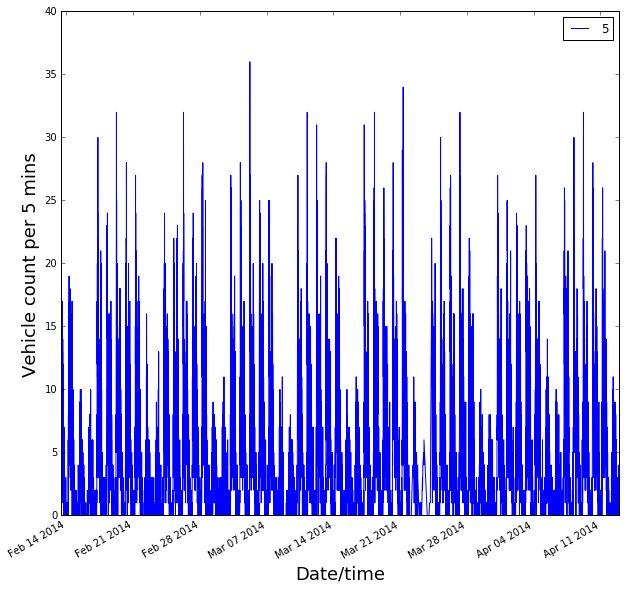

In [12]:
ax=df.plot(x=1,y=5,figsize=(10,10))
ax.set_ylabel('Vehicle count per 5 mins', fontsize=18)
ax.set_xlabel('Date/time', fontsize=18)

In [13]:
q="""
    select max(vehicleCount) from aarhus where ts > {t1} and ts < {t2}
    and extid='668';
"""
query=q.format(t1=startdate, t2=enddate)
print query
ds=c.ts_query('aarhus', query)
#print ds
print ds.rows


    select max(vehicleCount) from aarhus where ts > '2014-02-13T00:00:00' and ts < '2014-04-12T23:59:59.99'
    and extid='668';

[[36]]


#### Charting over 30 vehicle events

[32, datetime.datetime(2014, 2, 19, 5, 55)]
[32, datetime.datetime(2014, 2, 26, 6, 40)]
[33, datetime.datetime(2014, 3, 5, 5, 35)]
[36, datetime.datetime(2014, 3, 5, 5, 40)]
[32, datetime.datetime(2014, 3, 11, 6, 0)]
[31, datetime.datetime(2014, 3, 12, 5, 40)]
[31, datetime.datetime(2014, 3, 17, 5, 30)]
[32, datetime.datetime(2014, 3, 18, 7, 20)]
[34, datetime.datetime(2014, 3, 21, 7, 30)]
[32, datetime.datetime(2014, 3, 27, 6, 25)]
[32, datetime.datetime(2014, 4, 9, 5, 20)]
11


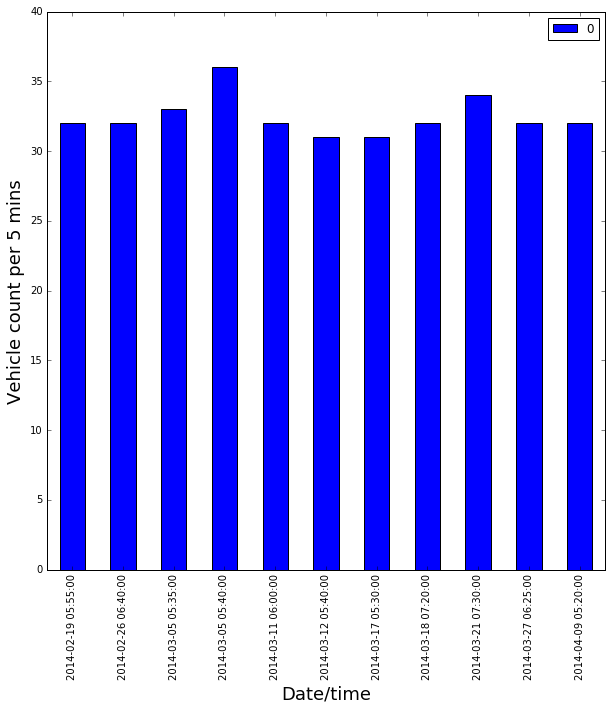

In [14]:
q="""
    select vehicleCount, ts from aarhus where ts > {t1} and ts < {t2}
    and extid='668' and vehicleCount>30;
"""
query=q.format(t1=startdate, t2=enddate)
#print query
ds3=c.ts_query('aarhus', query)
#print ds
for r in range(len(ds3.rows)):
    print ds3.rows[r]
print len(ds3.rows)
    
df3=pd.DataFrame(ds3.rows)
#print df3

#df3.head()

ax=df3.plot(x=1,y=0,kind='bar', figsize=(10,10))
ax.set_ylabel('Vehicle count per 5 mins', fontsize=18)
ax.set_xlabel('Date/time', fontsize=18)
